In [1]:
import json
import pprint
import numpy as np
from matplotlib import pyplot as plt
from utilities_hula_hoop import fourier_spectrum, plot_time_histories
import utilities_visualization

# Data

Active slice (here, [1300,2300]) of each quantity of each sensor.

- Inititally stored as a dictionary.
- First level: 5 sensors ('OR', 'OL', 'IB', 'IT', 'IL')
- Second level: 22 quantities ('time', 'ax', 'ay', 'az', 'phi', 'theta', 'psi', 'wx', 'wy', 'wz', 'phidot', 'thetadot', 'psidot', 'Ax', 'Ay', 'Az', 'dx', 'dy', 'dz', 'vx', 'vy', 'vz')

In [2]:
# Data was saved as a dictionary using experiment_save_data.py.
# To regenerate the data (use different experiment data or different active slice other than [1300-2300]),
# Go to experiments directory and run in python:
    # python experiment_save_data.py

with open("data_2025-09-03 Euler Angles_20250903_203926.json", 'r') as f:
    data_dict = json.load(f)

In [3]:
print("Data Dictionary Structure:")
print(f"{pprint.pformat(data_dict, depth=2)[:210]}\n...")
print(f"{len(list(data_dict['OR'].keys()))} Quantities Included:")
print([data_dict['OR'].keys()])

Data Dictionary Structure:
{'IB': {'Ax': [...],
        'Ay': [...],
        'Az': [...],
        'ax': [...],
        'ay': [...],
        'az': [...],
        'dx': [...],
        'dy': [...],
        'dz': [...],
        'phi': [...],
...
23 Quantities Included:
[dict_keys(['time', 'ax', 'ay', 'az', 'phi', 'theta', 'psi', 'wx', 'wy', 'wz', 'wxy', 'phidot', 'thetadot', 'psidot', 'Ax', 'Ay', 'Az', 'dx', 'dy', 'dz', 'vx', 'vy', 'vz'])]


In [4]:
def get_top_frequencies(signal, fs, top_n=3):
    n = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)
    magnitudes = np.abs(fft_vals)

    # Get indices of top N magnitudes (ignoring zero-frequency DC)
    idx = np.argsort(magnitudes[1:])[-top_n:] + 1
    return freqs[idx], magnitudes[idx]

[3.96 0.6  1.2 ]
fundamental frequency: [1.2] Hz


Text(0.5, 1.0, 'FFT wz')

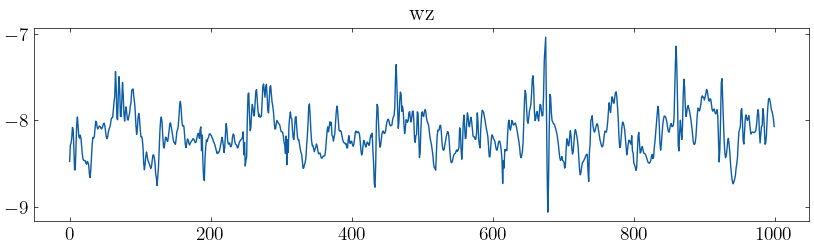

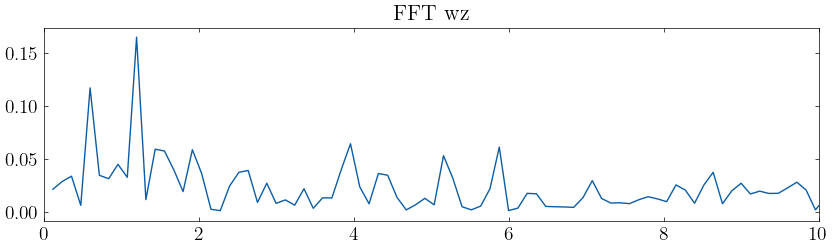

In [5]:
sensor = 'OR'
component = 'wz'
time = data_dict['OR']['time']

series = np.array(data_dict[sensor][component])
dt = 1/120

fig,ax = plt.subplots(figsize=(10,2.5))
ax.plot(series)
ax.set_title(f"{component}")

fig,ax = plt.subplots(figsize=(10,2.5))
freqs, amps = fourier_spectrum(series, dt)
freqs2, amps2 = get_top_frequencies(series, 1/dt)
print(freqs2)
fundamental = freqs[np.where(amps==max(amps))[0]]
print(f"fundamental frequency: {fundamental} Hz")
ax.plot(freqs,amps)
ax.set_xlim(0,10)
ax.set_title(f"FFT {component}")

In [6]:
sensor_labels_less = {
    "OR": "Hoop", 
    "IB": "Femur",
    "IT": "Tibia",
    "IL": "Cuneiform"
}
y_limits_less = {
    'OR': [-10, 5],
    'IB': [-5, 5],
    'IT': [-5, 5],
    'IL': [-5, 5],
}
data_dict_less = {
    sensor: {k:v for k,v in data.items() if k in ['phidot','thetadot','psidot']}
    for sensor,data in data_dict.items() if sensor in ['OR','IB','IT','IL']
}
fig = plot_time_histories(sensor_labels_less, data_dict_less, time, title="", y_limits=y_limits_less, one_per=True)
fig.write_image("euler_derivatives.svg", scale=3)


In [7]:
# psidot_mean = -np.mean(data_dict['OR']['psidot'])
# print(f"{psidot_mean=}")
# psidot_hertz = psidot_mean/(2*np.pi)
psidot_hertz = 1.35 # Hz
print(f"{psidot_hertz=}")
r = 0.415*(1-psidot_hertz/1.96)
print(f"{r=}")
waist_circumference_meters = 2*np.pi*r
print(f"{waist_circumference_meters=} (m)")
waist_circumference_inches = waist_circumference_meters*100/2.54
print(f"{waist_circumference_inches=} (in)")

psidot_hertz=1.35
r=0.1291581632653061
waist_circumference_meters=0.8115246737308734 (m)
waist_circumference_inches=31.9497903043651 (in)
